Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Fill-in-the-blank Practice Session

In [2]:
file_path = "correctness fill in the blanks.xlsx"
df_correctness = pd.read_excel(file_path)

In [3]:
df_correctness.rename(columns=lambda x: x.strip().replace("Question ", "Q").replace("Participant id", "Participant ID"), inplace=True)


In [4]:
question_cols = [col for col in df_correctness.columns if col.startswith("Q")]
score_matrix_correctness = df_correctness[["Participants No"] + question_cols].set_index("Participants No")

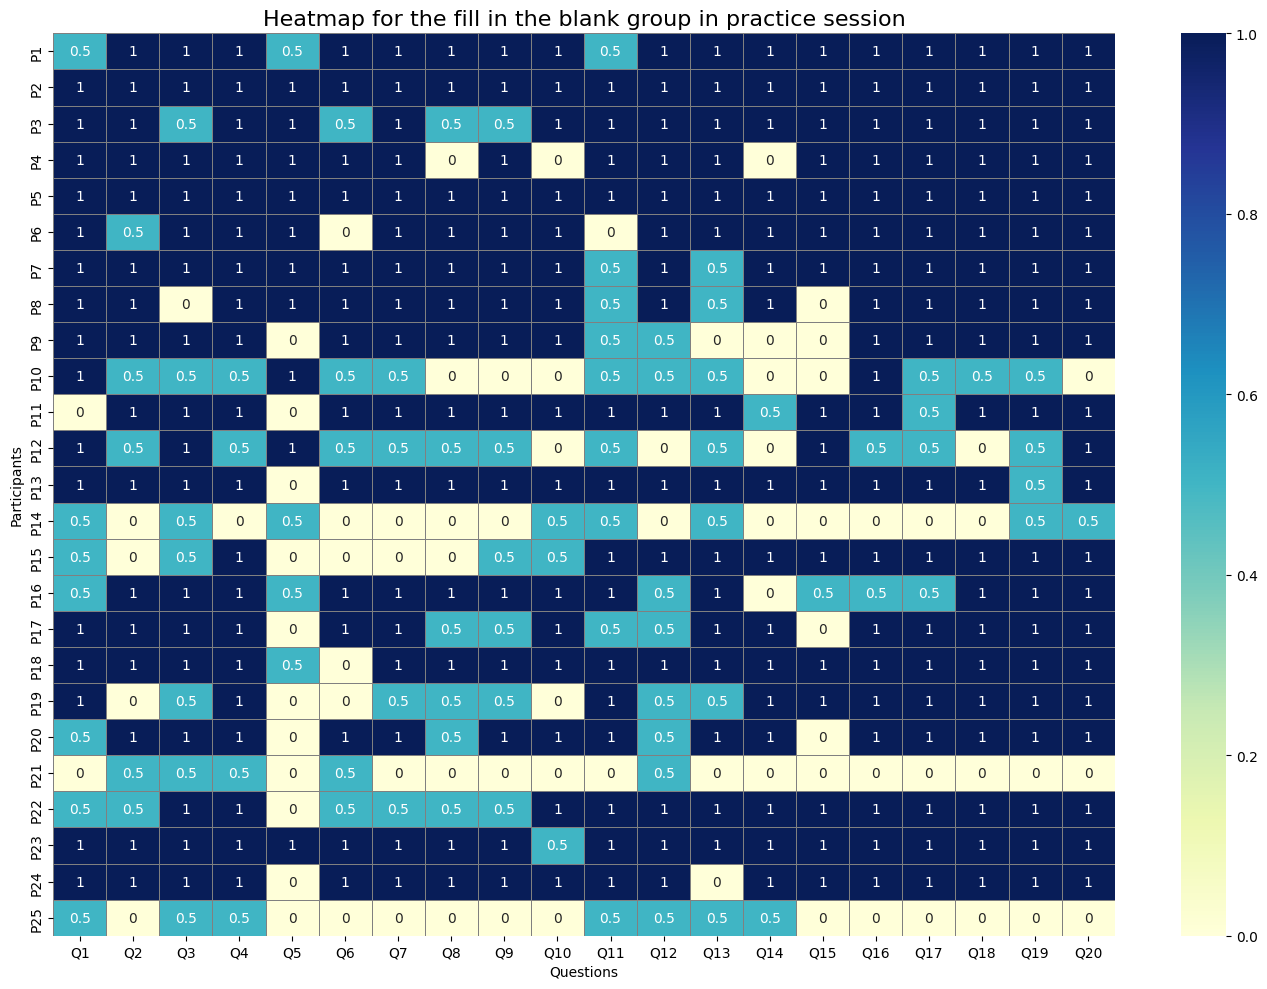

In [5]:
plt.figure(figsize=(14, 10))
sns.heatmap(score_matrix_correctness, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5, linecolor='gray')
plt.title("Heatmap for the fill in the blank group in practice session", fontsize=16)
plt.xlabel("Questions")
plt.ylabel("Participants")
plt.tight_layout()

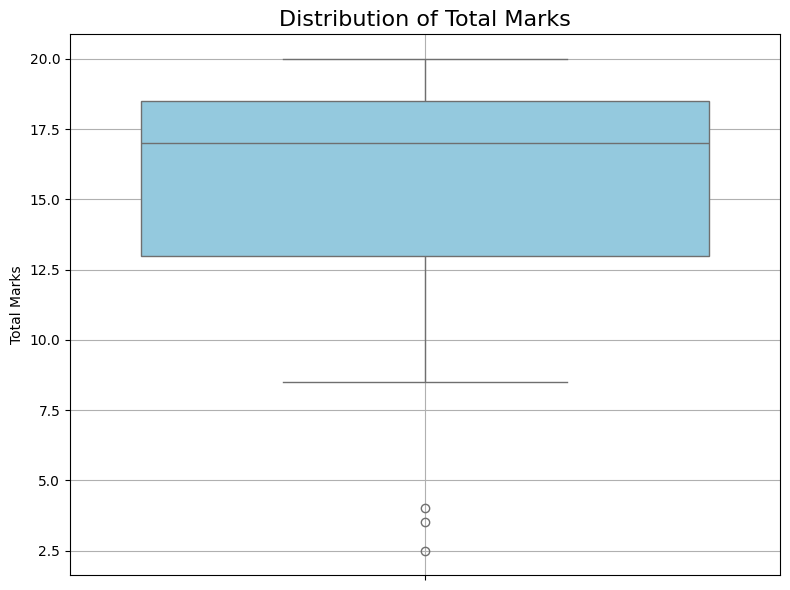

In [6]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_correctness["Total Marks"], color="skyblue")
plt.title("Distribution of Total Marks", fontsize=16)
plt.ylabel("Total Marks")
plt.grid(True)
plt.tight_layout()

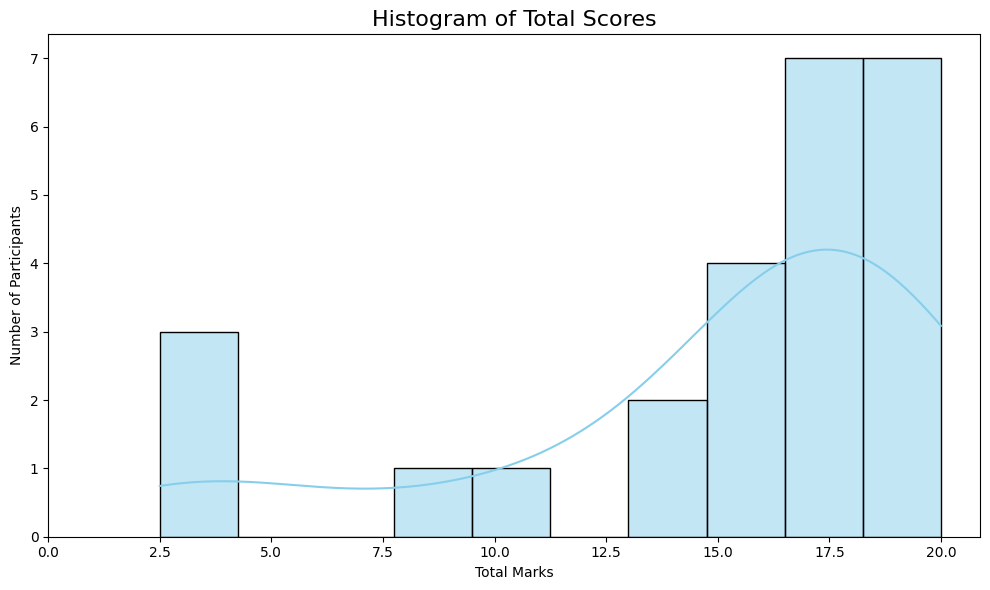

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df_correctness["Total Marks"], bins=10, kde=True, color="skyblue", edgecolor="black")
plt.title("Histogram of Total Scores", fontsize=16)
plt.xlabel("Total Marks")
plt.ylabel("Number of Participants")
plt.xlim(left=0)
plt.tight_layout()


Real Programming Practice Session

In [8]:
file_path = "correctness real coding.xlsx"
df_correctness_real = pd.read_excel(file_path)

In [9]:
df_correctness_real.rename(columns=lambda x: x.strip().replace("Question ", "Q").replace("Participant id", "Participant ID"), inplace=True)


In [10]:
question_cols_real = [col for col in df_correctness_real.columns if col.startswith("Q")]
score_matrix_correctness_real = df_correctness_real[["Participants No"] + question_cols_real].set_index("Participants No")

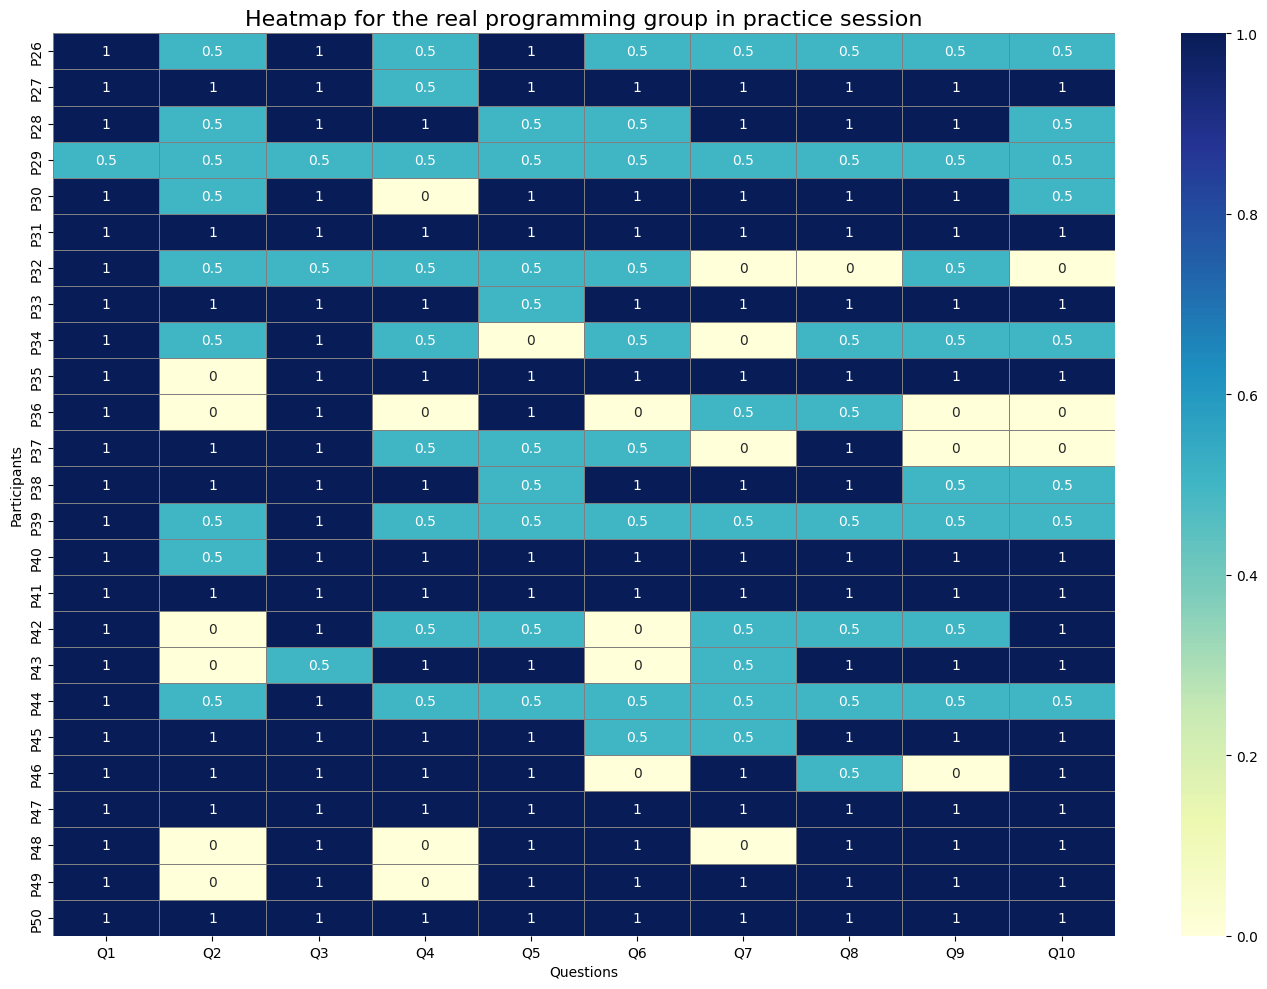

In [11]:
plt.figure(figsize=(14, 10))
sns.heatmap(score_matrix_correctness_real, annot=True, cmap="YlGnBu", cbar=True, linewidths=0.5, linecolor='gray')
plt.title("Heatmap for the real programming group in practice session", fontsize=16)
plt.xlabel("Questions")
plt.ylabel("Participants")
plt.tight_layout()

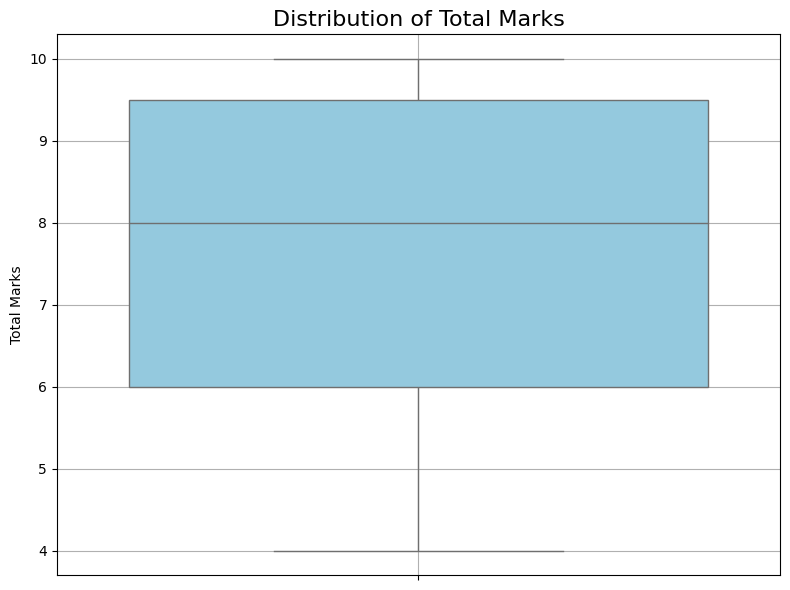

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df_correctness_real["Total Marks"], color="skyblue")
plt.title("Distribution of Total Marks", fontsize=16)
plt.ylabel("Total Marks")
plt.grid(True)
plt.tight_layout()

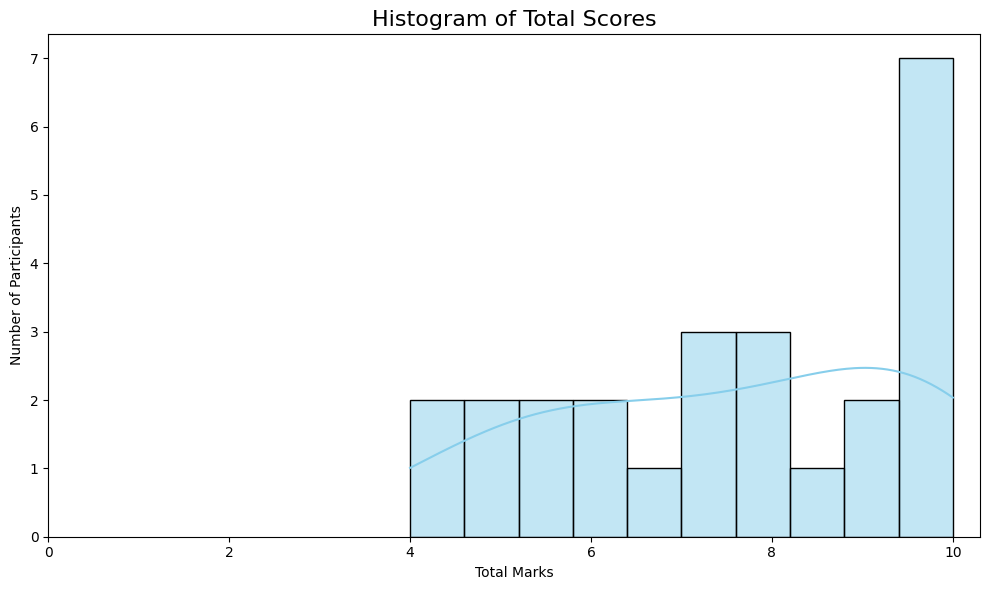

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df_correctness_real["Total Marks"], bins=10, kde=True, color="skyblue", edgecolor="black")
plt.title("Histogram of Total Scores", fontsize=16)
plt.xlabel("Total Marks")
plt.ylabel("Number of Participants")
plt.xlim(left=0)
plt.tight_layout()


Final Test Comparison

In [14]:
file_path = "correctness final test.xlsx"
df_correctness_final = pd.read_excel(file_path)
df_correctness_final.rename(columns=lambda x: x.strip().replace("Question ", "Q").replace("Participant id", "Participant ID"), inplace=True)
question_cols_final = [col for col in df_correctness_final.columns if col.startswith("Q")]
score_matrix_correctness_final = df_correctness_final[["Participants No"] + question_cols_final].set_index("Participants No")

In [15]:
score_means = df_correctness_final.groupby("Group")["Final Score"].mean()
group_positions = {group: i for i, group in enumerate(df_correctness_final["Group"].unique())}


/tmp/ipython-input-16-3915167836.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_correctness_final, x='Group', y='Final Score', palette='pastel')


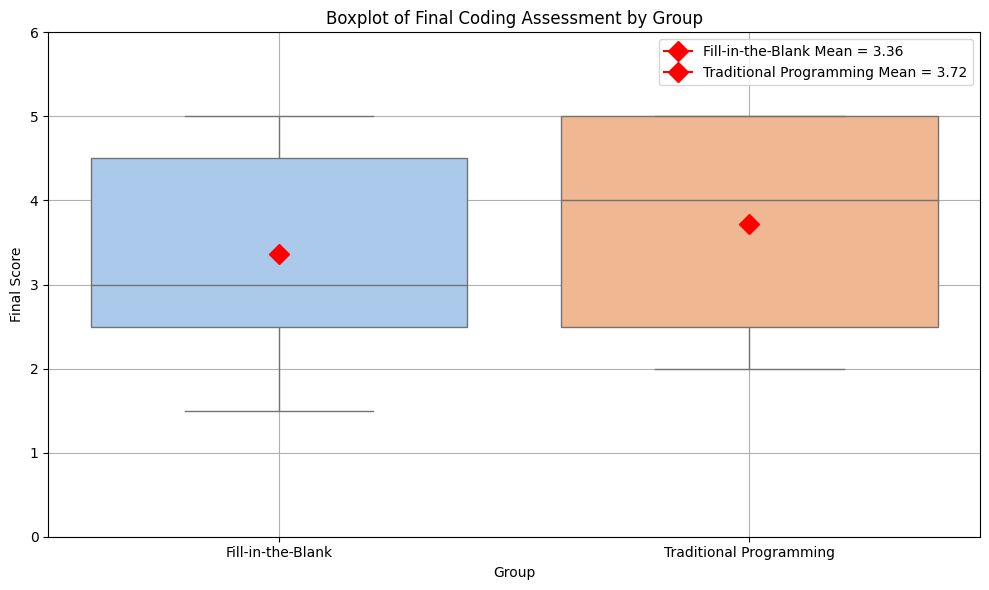

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_correctness_final, x='Group', y='Final Score', palette='pastel')
for group, mean in score_means.items():
    xpos = group_positions[group]
    plt.plot(xpos, mean, marker='D', color='red', markersize=10, label=f"{group} Mean = {mean:.2f}")

plt.ylim(0, 6)
plt.title("Boxplot of Final Coding Assessment by Group")
plt.xlabel("Group")
plt.ylabel("Final Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-17-2911335052.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_correctness_final, x='Group', y='Final Score', palette='pastel')


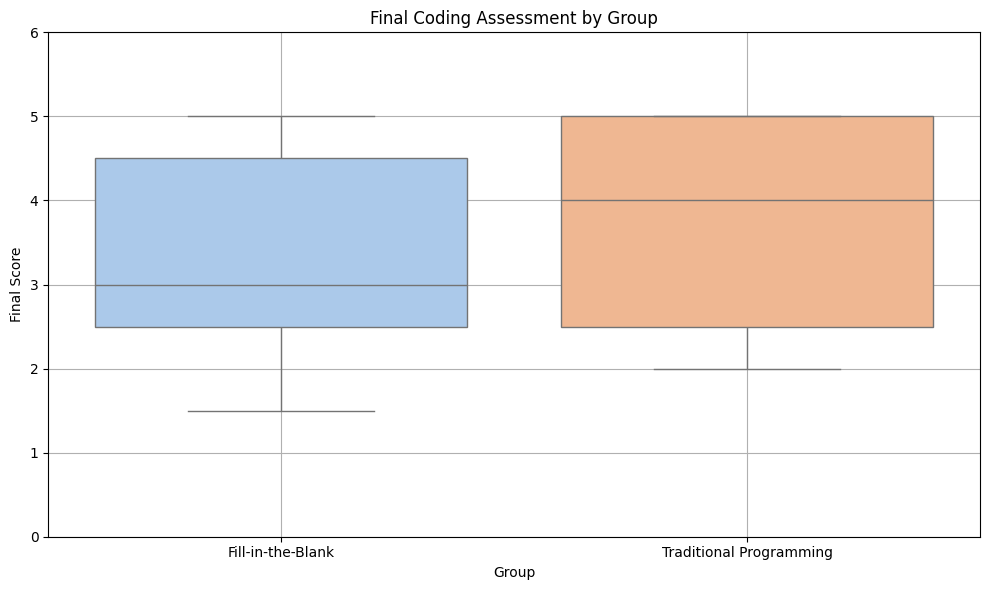

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_correctness_final, x='Group', y='Final Score', palette='pastel')
plt.ylim(0, 6)
plt.title("Final Coding Assessment by Group")
plt.xlabel("Group")
plt.ylabel("Final Score")
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
melted_df = df_correctness_final.melt(
    id_vars=['Group'],
    value_vars=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'],
    var_name='Question',
    value_name='Score'
)

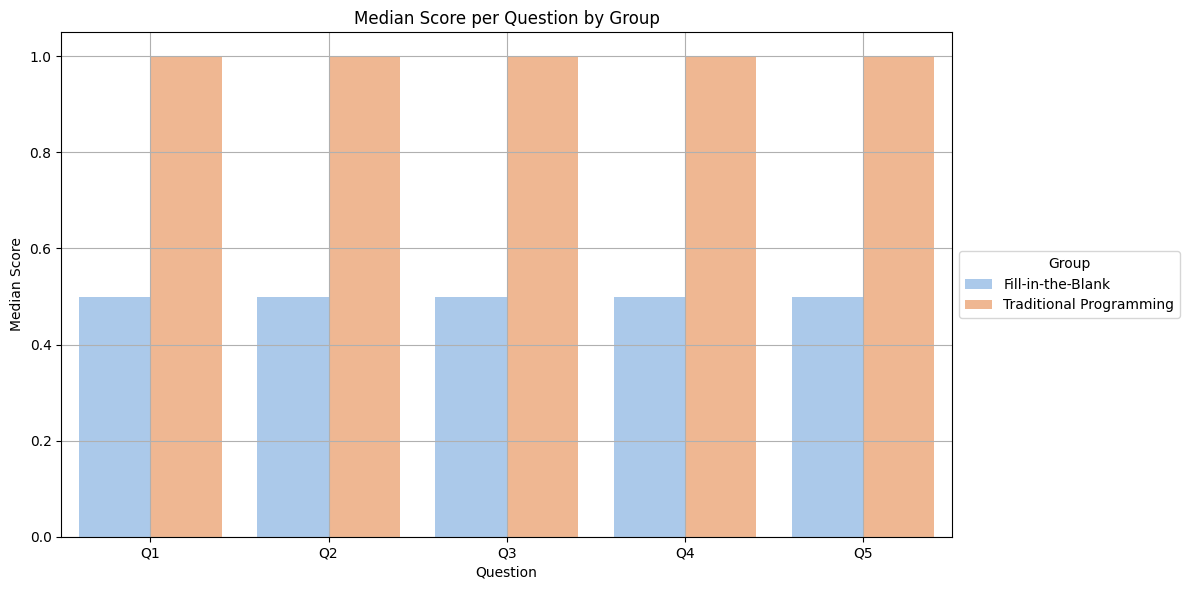

In [19]:
# Compute the median scores per group and question
median_scores = melted_df.groupby(['Group', 'Question'])['Score'].median().reset_index()

# Create a barplot for median scores
plt.figure(figsize=(12, 6))
sns.barplot(data=median_scores, x='Question', y='Score', hue='Group', palette='pastel')
plt.title("Median Score per Question by Group")
plt.xlabel("Question")
plt.ylabel("Median Score")
plt.grid(True)
plt.legend(title='Group', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


In [20]:
# Import required libraries
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

# Load your data (replace with your filename)
df = pd.read_excel('correctness final test.xlsx')

# Clean up group names
df['Group'] = df['Group'].str.strip()

# Split the scores by group
fill_scores = df[df['Group'] == 'Fill-in-the-Blank']['Final Score']
real_scores = df[df['Group'] == 'Real Programming']['Final Score']

# Run independent samples t-test (Welch's t-test)
t_stat, p_value = ttest_ind(fill_scores, real_scores, equal_var=False)

# Calculate Cohen's d (effect size)
mean_diff = fill_scores.mean() - real_scores.mean()
pooled_sd = np.sqrt(((fill_scores.std(ddof=1) ** 2) + (real_scores.std(ddof=1) ** 2)) / 2)
cohens_d = mean_diff / pooled_sd

# Print results
print(f'Fill-in-the-Blank Mean: {fill_scores.mean():.2f}')
print(f'Real Programming Mean: {real_scores.mean():.2f}')
print(f't-statistic: {t_stat:.3f}')
print(f'p-value: {p_value:.3f}')
print(f"Cohen\'s d: {cohens_d:.3f}")


Fill-in-the-Blank Mean: 3.36
Real Programming Mean: nan
t-statistic: nan
p-value: nan
Cohen's d: nan


/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


Sentiment Analysis

In [21]:
df = pd.read_csv("learning comments.csv")

# Calculate sentiment counts by group
group_sentiment_counts = df.groupby(['Group', 'Sentiment']).size().unstack(fill_value=0)

# Summarize key points for narrative
fill_total = group_sentiment_counts.loc['Fill-in-the-Blank'].sum()
real_total = group_sentiment_counts.loc['Real Programming'].sum()

fill_positive_pct = group_sentiment_counts.loc['Fill-in-the-Blank', 'Positive'] / fill_total * 100
real_positive_pct = group_sentiment_counts.loc['Real Programming', 'Positive'] / real_total * 100

fill_negative_pct = group_sentiment_counts.loc['Fill-in-the-Blank', 'Negative'] / fill_total * 100
real_negative_pct = group_sentiment_counts.loc['Real Programming', 'Negative'] / real_total * 100

fill_neutral_pct = group_sentiment_counts.loc['Fill-in-the-Blank', 'Neutral'] / fill_total * 100
real_neutral_pct = group_sentiment_counts.loc['Real Programming', 'Neutral'] / real_total * 100

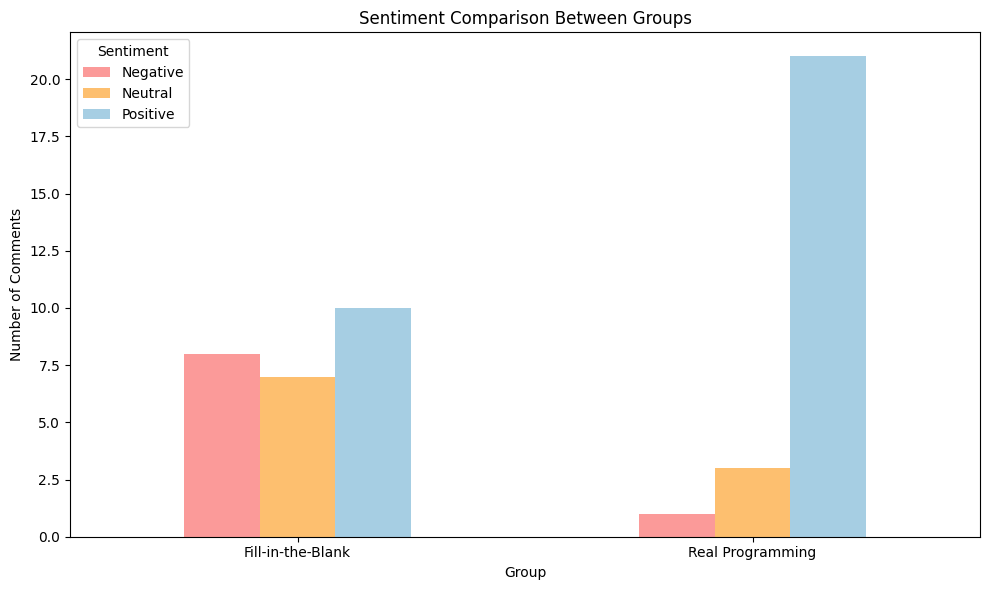

In [22]:
# Reuse previous sentiment by group calculation
group_sentiment_counts = df.groupby(['Group', 'Sentiment']).size().unstack(fill_value=0)

color_palette_custom = ['#fb9a99', '#fdbf6f', '#a6cee3']

group_sentiment_counts.plot(kind='bar', figsize=(10, 6), color=color_palette_custom)
plt.title("Sentiment Comparison Between Groups")
plt.xlabel("Group")
plt.ylabel("Number of Comments")
plt.xticks(rotation=0)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()


Fill-in-the-blank Practice Session Time Calculation

In [23]:
file_path = "timing fill in the blanks.xlsx"
df_timing = pd.read_excel(file_path)
df_timing.head()

,Participant ID,Participants No,Total Time
0,63469a438666ebd4714dcb59,P1,09m:49s
1,6828ed623845b67ff23df606,P2,30m:30s
2,66c9f7305f8a64d04cb5344c,P3,12m:34s
3,672f5d9e39d2d29090ebbb30,P4,49m:26s
4,5c7ea15cb215c6000122b48d,P5,09m:01s


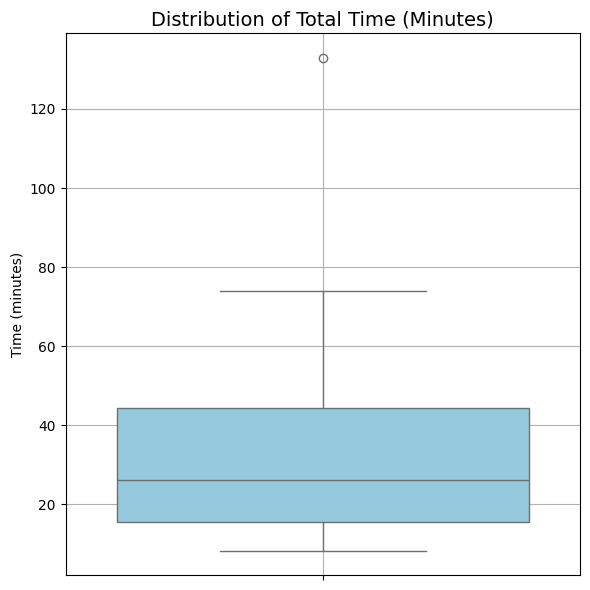

In [24]:
import re

# Updated time conversion function using regex
def parse_time_to_minutes(time_str):
    if pd.isna(time_str):
        return None
    hours = minutes = seconds = 0
    h_match = re.search(r'(\d+)h', time_str)
    m_match = re.search(r'(\d+)m', time_str)
    s_match = re.search(r'(\d+)s', time_str)

    if h_match:
        hours = int(h_match.group(1))
    if m_match:
        minutes = int(m_match.group(1))
    if s_match:
        seconds = int(s_match.group(1))

    total_minutes = hours * 60 + minutes + seconds / 60
    return total_minutes

# Apply updated function
df_timing['Time (minutes)'] = df_timing['Total Time'].apply(parse_time_to_minutes)

mean_time = df_timing["Time (minutes)"].mean()

# Create and save the fixed box plot
plt.figure(figsize=(6, 6))
sns.boxplot(y=df_timing["Time (minutes)"], color="skyblue")
#plt.axhline(mean_time, color='red', linestyle='--', label=f'Mean = {mean_time:.2f} min')
plt.title("Distribution of Total Time (Minutes)", fontsize=14)
plt.ylabel("Time (minutes)")
#plt.legend()
plt.grid(True)
plt.tight_layout()


Practice Session Real Programming Time Calculation

In [25]:
timing_file_path = "timing real coding.xlsx"
df_timing = pd.read_excel(timing_file_path)

df_timing.info(), df_timing.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Duration          25 non-null     object
 1   Prolific ID       25 non-null     object
 2   Participants No.  25 non-null     object
dtypes: object(3)
memory usage: 732.0+ bytes


(None,
            Duration               Prolific ID Participants No.
 count            25                        25               25
 unique           25                        25               25
 top     01h:47m:08s  66ce5adac1cd4b6037be4a63              P26
 freq              1                         1                1)

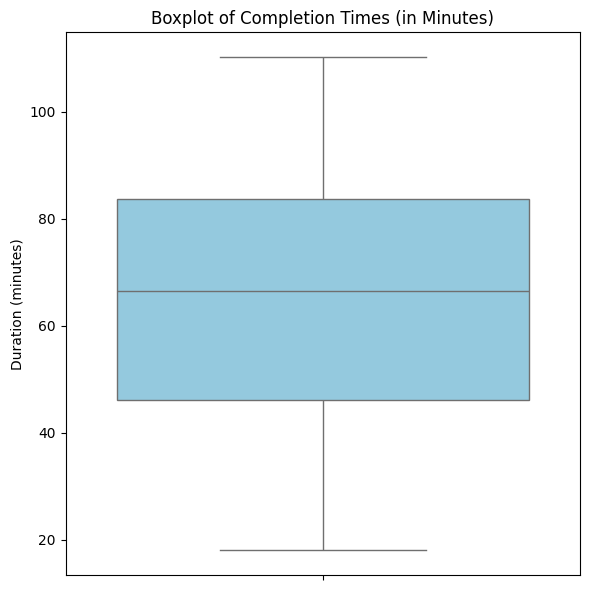

,Duration (mins)
count,25.000000
mean,65.890667
std,27.484291
min,18.000000
25%,46.083333
50%,66.516667
75%,83.666667
max,110.233333


In [26]:
import re

# Updated function to parse duration like "01h:47m:08s"
def parse_duration_correctly(duration_str):
    hours = minutes = seconds = 0
    h_match = re.search(r"(\d+)h", duration_str)
    m_match = re.search(r"(\d+)m", duration_str)
    s_match = re.search(r"(\d+)s", duration_str)

    if h_match:
        hours = int(h_match.group(1))
    if m_match:
        minutes = int(m_match.group(1))
    if s_match:
        seconds = int(s_match.group(1))

    total_minutes = hours * 60 + minutes + seconds / 60
    return total_minutes

# Apply the corrected function
df_timing["Duration (mins)"] = df_timing["Duration"].apply(parse_duration_correctly)

# Compute summary statistics
summary_stats = df_timing["Duration (mins)"].describe()

plt.figure(figsize=(6, 6))
sns.boxplot(y=df_timing["Duration (mins)"], color="skyblue")
plt.title("Boxplot of Completion Times (in Minutes)")
plt.ylabel("Duration (minutes)")
plt.tight_layout()
plt.show()

summary_stats


Final Test Time Comparison

In [27]:
# Load the newly uploaded timing data
file_path = "timing final test.xlsx"
df_timing = pd.read_excel(file_path)

# Show the first few rows to understand the structure
df_timing.head()


,Duration,Participants ID,Participants No.,Group
0,21m:13s,63469a438666ebd4714dcb59,P1,Fill-in-the-Blank
1,36m:03s,6828ed623845b67ff23df606,P2,Fill-in-the-Blank
2,22m:08s,66c9f7305f8a64d04cb5344c,P3,Fill-in-the-Blank
3,13m:32s,672f5d9e39d2d29090ebbb30,P4,Fill-in-the-Blank
4,37m:55s,5c7ea15cb215c6000122b48d,P5,Fill-in-the-Blank


In [28]:
# Enhanced conversion function to handle 'H:M:S' and 'M:S'
import re

def flexible_duration_to_minutes(duration_str):
    try:
        h, m, s = 0, 0, 0
        match = re.match(r"(?:(\d+)h:)?(?:(\d+)m:)?(?:(\d+)s)?", duration_str)
        if match:
            h = int(match.group(1)) if match.group(1) else 0
            m = int(match.group(2)) if match.group(2) else 0
            s = int(match.group(3)) if match.group(3) else 0
        return round(h * 60 + m + s / 60, 2)
    except:
        return None

# Apply the improved function
df_timing["Duration (minutes)"] = df_timing["Duration"].apply(flexible_duration_to_minutes)

# Recompute correct group statistics
group_summary_fixed = df_timing.groupby("Group")["Duration (minutes)"].describe().round(2)
group_summary_fixed

,count,mean,std,min,25%,50%,75%,max
Group,,,,,,,,
Fill-in-the-Blank,25.0,37.04,17.30,4.75,26.6,32.60,48.97,71.65
Traditional Programming,25.0,33.20,19.15,6.80,21.1,28.43,38.57,87.10


In [29]:
group_mean = df_timing.groupby("Group")["Duration (minutes)"].mean().round(2)
group_mean

,Duration (minutes)
Group,
Fill-in-the-Blank,37.04
Traditional Programming,33.20


/tmp/ipython-input-30-921226976.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_timing, x="Group", y="Duration (minutes)", palette="pastel")


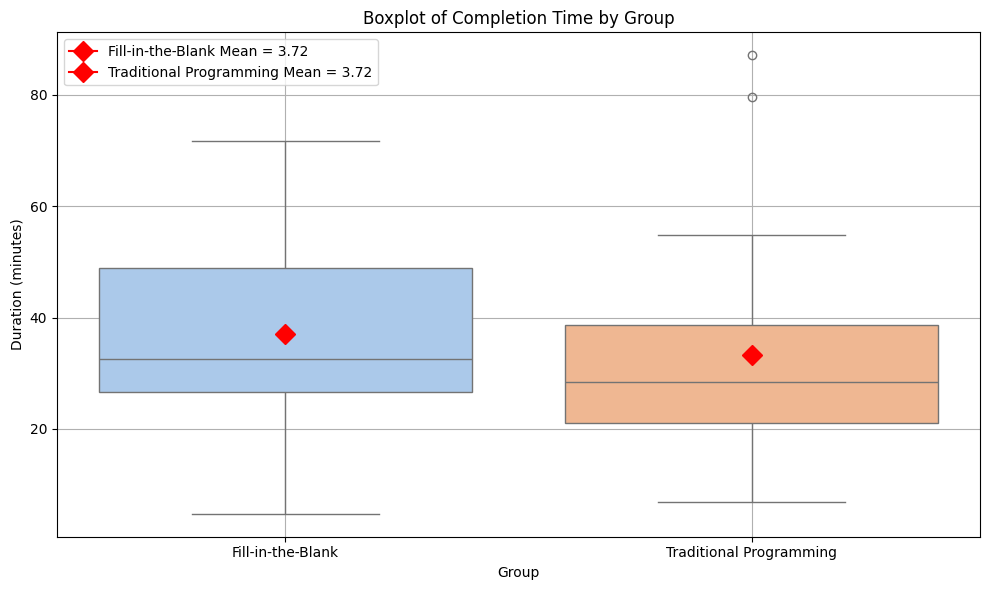

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot style
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_timing, x="Group", y="Duration (minutes)", palette="pastel")

for group in group_positions:
    xpos = group_positions[group]
    mean_val = group_mean[group]

    # Mean marker (red diamond)
    plt.plot(xpos, mean_val, marker='D', color='red', markersize=10, label=f"{group} Mean = {mean:.2f}")

plt.title("Boxplot of Completion Time by Group")
plt.xlabel("Group")
plt.ylabel("Duration (minutes)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


/tmp/ipython-input-31-2206283524.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_timing, x="Group", y="Duration (minutes)", palette="pastel")
/tmp/ipython-input-31-2206283524.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


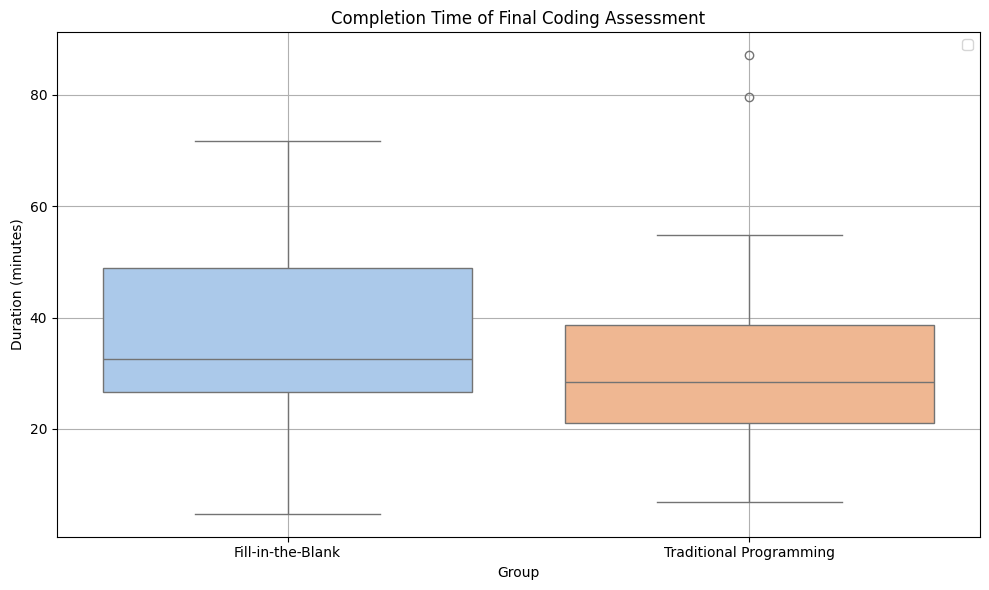

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plot style
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_timing, x="Group", y="Duration (minutes)", palette="pastel")

plt.title("Completion Time of Final Coding Assessment")
plt.xlabel("Group")
plt.ylabel("Duration (minutes)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


t-test for Final Test Score Comparison

In [32]:
# Import required libraries
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np

# Load your data (replace with your filename)
df = pd.read_excel('correctness final test.xlsx')

# Clean up group names
df['Group'] = df['Group'].str.strip()

# Split the scores by group
fill_scores = df[df['Group'] == 'Fill-in-the-Blank']['Final Score']
real_scores = df[df['Group'] == 'Real Programming']['Final Score']

# Run independent samples t-test (Welch's t-test)
t_stat, p_value = ttest_ind(fill_scores, real_scores, equal_var=False)

# Calculate Cohen's d (effect size)
mean_diff = fill_scores.mean() - real_scores.mean()
pooled_sd = np.sqrt(((fill_scores.std(ddof=1) ** 2) + (real_scores.std(ddof=1) ** 2)) / 2)
cohens_d = mean_diff / pooled_sd

# Print results
print(f'Fill-in-the-Blank Mean: {fill_scores.mean():.2f}')
print(f'Real Programming Mean: {real_scores.mean():.2f}')
print(f't-statistic: {t_stat:.3f}')
print(f'p-value: {p_value:.3f}')
print(f"Cohen\'s d: {cohens_d:.3f}")


Fill-in-the-Blank Mean: 3.36
Real Programming Mean: nan
t-statistic: nan
p-value: nan
Cohen's d: nan


/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


Paired t-test (not needed)

In [33]:
# Load the three Excel files
fill_practice_df = pd.read_excel('correctness fill in the blanks.xlsx')
real_practice_df = pd.read_excel('correctness real coding.xlsx')
final_test_df = pd.read_excel('correctness final test.xlsx')


In [34]:
from scipy.stats import ttest_rel

# --- 1️⃣ Prepare Fill-in-the-Blank group ---
# Match by Participant No
fill_final_df = final_test_df[final_test_df['Group'] == 'Fill-in-the-Blank'][['Participants No', 'Final Score']].copy()
fill_merged = pd.merge(fill_practice_df[['Participants No', 'Total Marks']], fill_final_df, on='Participants No')
fill_merged.rename(columns={'Total Marks': 'Practice Score'}, inplace=True)

# Paired t-test: Fill-in-the-Blank
fill_t_stat, fill_p_value = ttest_rel(fill_merged['Practice Score'], fill_merged['Final Score'])

# Effect size: Cohen's d for paired data
fill_diff = fill_merged['Final Score'] - fill_merged['Practice Score']
fill_cohens_d = fill_diff.mean() / fill_diff.std(ddof=1)

# --- 2️⃣ Prepare Real Programming group ---
real_final_df = final_test_df[final_test_df['Group'] == 'Traditional Programming'][['Participants No', 'Final Score']].copy()
real_merged = pd.merge(real_practice_df[['Participants No', 'Total Marks']], real_final_df, on='Participants No')
real_merged.rename(columns={'Total Marks': 'Practice Score'}, inplace=True)

# Paired t-test: Real Programming
real_t_stat, real_p_value = ttest_rel(real_merged['Practice Score'], real_merged['Final Score'])

# Effect size: Cohen's d for paired data
real_diff = real_merged['Final Score'] - real_merged['Practice Score']
real_cohens_d = real_diff.mean() / real_diff.std(ddof=1)

# Prepare results
paired_ttest_results = {
    'Fill-in-the-Blank': {
        'Practice Mean': fill_merged['Practice Score'].mean(),
        'Final Mean': fill_merged['Final Score'].mean(),
        't-statistic': fill_t_stat,
        'p-value': fill_p_value,
        "Cohen's d": fill_cohens_d
    },
    'Traditional Programming': {
        'Practice Mean': real_merged['Practice Score'].mean(),
        'Final Mean': real_merged['Final Score'].mean(),
        't-statistic': real_t_stat,
        'p-value': real_p_value,
        "Cohen's d": real_cohens_d
    }
}

paired_ttest_results


{'Fill-in-the-Blank': {'Practice Mean': np.float64(14.92),
  'Final Mean': np.float64(3.36),
  't-statistic': np.float64(13.017555792585892),
  'p-value': np.float64(2.2764884204380937e-12),
  "Cohen's d": np.float64(-2.603511158517178)},
 'Traditional Programming': {'Practice Mean': np.float64(7.52),
  'Final Mean': np.float64(3.72),
  't-statistic': np.float64(16.854244977764257),
  'p-value': np.float64(8.36257635567789e-15),
  "Cohen's d": np.float64(-3.370848995552852)}}

In [35]:
# Normalize to % scores

# Fill-in-the-Blank
fill_merged['Practice %'] = (fill_merged['Practice Score'] / 20) * 100
fill_merged['Final %'] = (fill_merged['Final Score'] / 5) * 100

# Real Programming
real_merged['Practice %'] = (real_merged['Practice Score'] / 10) * 100
real_merged['Final %'] = (real_merged['Final Score'] / 5) * 100

# Paired t-test on % scores (Fill-in-the-Blank)
fill_pct_t_stat, fill_pct_p_value = ttest_rel(fill_merged['Practice %'], fill_merged['Final %'])
fill_pct_diff = fill_merged['Final %'] - fill_merged['Practice %']
fill_pct_cohens_d = fill_pct_diff.mean() / fill_pct_diff.std(ddof=1)

# Paired t-test on % scores (Real Programming)
real_pct_t_stat, real_pct_p_value = ttest_rel(real_merged['Practice %'], real_merged['Final %'])
real_pct_diff = real_merged['Final %'] - real_merged['Practice %']
real_pct_cohens_d = real_pct_diff.mean() / real_pct_diff.std(ddof=1)

# Prepare results
pct_ttest_results = {
    'Fill-in-the-Blank': {
        'Practice % Mean': fill_merged['Practice %'].mean(),
        'Final % Mean': fill_merged['Final %'].mean(),
        't-statistic': fill_pct_t_stat,
        'p-value': fill_pct_p_value,
        "Cohen's d": fill_pct_cohens_d
    },
    'Traditional Programming': {
        'Practice % Mean': real_merged['Practice %'].mean(),
        'Final % Mean': real_merged['Final %'].mean(),
        't-statistic': real_pct_t_stat,
        'p-value': real_pct_p_value,
        "Cohen's d": real_pct_cohens_d
    }
}

pct_ttest_results


{'Fill-in-the-Blank': {'Practice % Mean': np.float64(74.6),
  'Final % Mean': np.float64(67.2),
  't-statistic': np.float64(1.9140242625783903),
  'p-value': np.float64(0.06761478295930282),
  "Cohen's d": np.float64(-0.38280485251567803)},
 'Traditional Programming': {'Practice % Mean': np.float64(75.2),
  'Final % Mean': np.float64(74.4),
  't-statistic': np.float64(0.3472794481039397),
  'p-value': np.float64(0.731408363286568),
  "Cohen's d": np.float64(-0.06945588962078796)}}

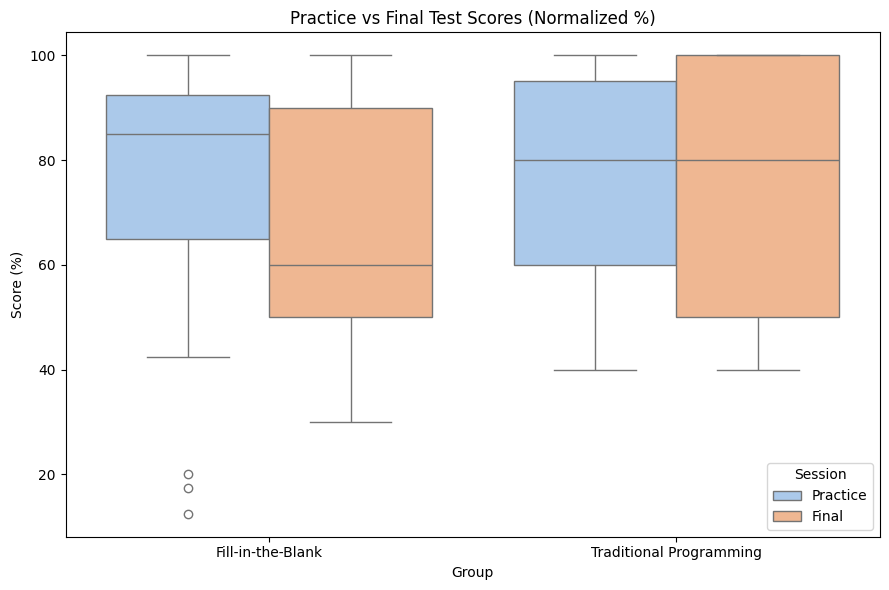

In [36]:
# Prepare for boxplots — stack data into long format for seaborn
fill_long = pd.DataFrame({
    'Group': ['Fill-in-the-Blank'] * len(fill_merged) * 2,
    'Session': ['Practice'] * len(fill_merged) + ['Final'] * len(fill_merged),
    'Score %': pd.concat([fill_merged['Practice %'], fill_merged['Final %']], ignore_index=True)
})

real_long = pd.DataFrame({
    'Group': ['Traditional Programming'] * len(real_merged) * 2,
    'Session': ['Practice'] * len(real_merged) + ['Final'] * len(real_merged),
    'Score %': pd.concat([real_merged['Practice %'], real_merged['Final %']], ignore_index=True)
})

# Combine both groups
combined_long = pd.concat([fill_long, real_long], ignore_index=True)

# Draw boxplot
plt.figure(figsize=(9, 6))
sns.boxplot(x='Group', y='Score %', hue='Session', data=combined_long, palette='pastel')

plt.ylabel('Score (%)')
plt.title('Practice vs Final Test Scores (Normalized %)')
plt.legend(title='Session', loc='lower right')
plt.tight_layout()
plt.show()


In [37]:
for group, stats in pct_ttest_results.items():
    print(f"\n{group} Group")

    # Calculate standard deviations
    if group == 'Fill-in-the-Blank':
        practice_sd = fill_merged['Practice %'].std()
        final_sd = fill_merged['Final %'].std()
    else: # Real Programming
        practice_sd = real_merged['Practice %'].std()
        final_sd = real_merged['Final %'].std()

    print(f"Practice: {stats['Practice % Mean']:.1f}% ± {practice_sd:.1f}")
    print(f"Final:    {stats['Final % Mean']:.1f}% ± {final_sd:.1f}")
    print(f"t-statistic: {stats['t-statistic']:.3f}")
    print(f"p-value: {stats['p-value']:.3f}")



Fill-in-the-Blank Group
Practice: 74.6% ± 25.9
Final:    67.2% ± 23.5
t-statistic: 1.914
p-value: 0.068

Traditional Programming Group
Practice: 75.2% ± 19.8
Final:    74.4% ± 23.3
t-statistic: 0.347
p-value: 0.731


In [38]:
# Compute median scores for both groups (normalized % scores)

fill_median_practice = fill_merged['Practice %'].median()
fill_median_final = fill_merged['Final %'].median()

real_median_practice = real_merged['Practice %'].median()
real_median_final = real_merged['Final %'].median()

# Return results
{
    "Fill-in-the-Blank": {
        "Practice % Median": fill_median_practice,
        "Final % Median": fill_median_final
    },
    "Traditional Programming": {
        "Practice % Median": real_median_practice,
        "Final % Median": real_median_final
    }
}


{'Fill-in-the-Blank': {'Practice % Median': 85.0, 'Final % Median': 60.0},
 'Traditional Programming': {'Practice % Median': 80.0,
  'Final % Median': 80.0}}

In [39]:
# Fill-in-the-Blank group summary
print("Fill-in-the-Blank Practice % Summary:")
print(fill_merged['Practice %'].describe())
print("\nFill-in-the-Blank Final % Summary:")
print(fill_merged['Final %'].describe())

# Traditional Programming group summary
print("\nTraditional Programming Practice % Summary:")
print(real_merged['Practice %'].describe())
print("\nTraditional Programming Final % Summary:")
print(real_merged['Final %'].describe())


Fill-in-the-Blank Practice % Summary:
count     25.000000
mean      74.600000
std       25.907287
min       12.500000
25%       65.000000
50%       85.000000
75%       92.500000
max      100.000000
Name: Practice %, dtype: float64

Fill-in-the-Blank Final % Summary:
count     25.000000
mean      67.200000
std       23.544285
min       30.000000
25%       50.000000
50%       60.000000
75%       90.000000
max      100.000000
Name: Final %, dtype: float64

Traditional Programming Practice % Summary:
count     25.000000
mean      75.200000
std       19.815819
min       40.000000
25%       60.000000
50%       80.000000
75%       95.000000
max      100.000000
Name: Practice %, dtype: float64

Traditional Programming Final % Summary:
count     25.000000
mean      74.400000
std       23.288051
min       40.000000
25%       50.000000
50%       80.000000
75%      100.000000
max      100.000000
Name: Final %, dtype: float64


In [40]:
from scipy.stats import ttest_rel

# Paired t-test for Fill-in-the-Blank group (percentage scores)
fill_t_stat, fill_p_value = ttest_rel(fill_merged['Practice %'], fill_merged['Final %'])

# Paired t-test for Traditional Programming group (percentage scores)
real_t_stat, real_p_value = ttest_rel(real_merged['Practice %'], real_merged['Final %'])

# Print results
print("📊 P-Value Results")
print(f"Fill-in-the-Blank Group:\n  t-statistic = {fill_t_stat:.3f}, p-value = {fill_p_value:.4f}")
print(f"Traditional Programming Group:\n  t-statistic = {real_t_stat:.3f}, p-value = {real_p_value:.4f}")


📊 P-Value Results
Fill-in-the-Blank Group:
  t-statistic = 1.914, p-value = 0.0676
Traditional Programming Group:
  t-statistic = 0.347, p-value = 0.7314


In [41]:
from scipy.stats import ttest_ind

# ---------------------------------------------
# 🎯 Independent Samples t-Test:
# Compare Final % Scores between the two groups
# ---------------------------------------------

# Run Welch's t-test (does not assume equal variances)
t_stat, p_value = ttest_ind(
    fill_merged['Final %'],
    real_merged['Final %'],
    equal_var=False
)

# Print the result in a readable format
print("📊 Final Test Score Comparison Between Groups")
print(f"t-statistic: {t_stat:.3f}")
print(f"p-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("✅ The difference is statistically significant (p < 0.05).")
else:
    print("❌ The difference is not statistically significant (p ≥ 0.05).")


📊 Final Test Score Comparison Between Groups
t-statistic: -1.087
p-value: 0.2824
❌ The difference is not statistically significant (p ≥ 0.05).


Paired t test for time

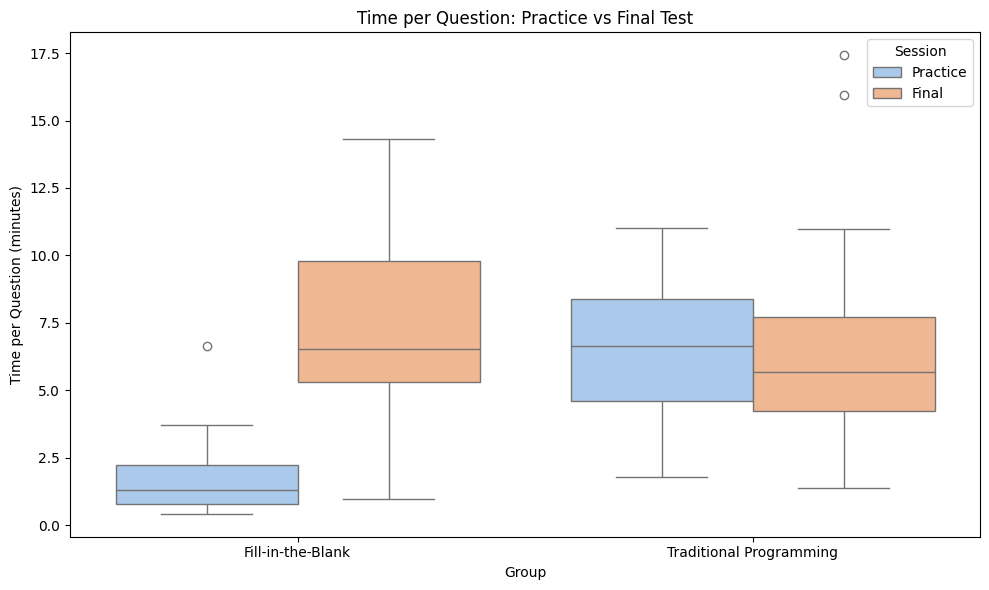

In [42]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_rel

# -------------------------------
# Step 1: Load Data
# -------------------------------
fill_practice = pd.read_excel('timing fill in the blanks.xlsx')
real_practice = pd.read_excel('timing real coding.xlsx')
final_test = pd.read_excel('timing final test.xlsx')

# Rename columns for consistency
fill_practice.rename(columns={'Total Time': 'Duration', 'Participants No': 'Participants No.'}, inplace=True)
real_practice.rename(columns={'Prolific ID': 'Participant ID'}, inplace=True)
final_test['Group'] = final_test['Group'].str.strip()

# -------------------------------
# Step 2: Convert Duration to Minutes
# -------------------------------
def parse_duration(duration_str):
    if isinstance(duration_str, str):
        duration_str = re.sub(r'[hms]', '', duration_str)
        parts = list(map(int, duration_str.split(':')))
        if len(parts) == 3:
            h, m, s = parts
        elif len(parts) == 2:
            h = 0
            m, s = parts
        else:
            h = m = s = 0
        return h * 60 + m + s / 60
    return np.nan

# Apply conversion
fill_practice['Time_min'] = fill_practice['Duration'].apply(parse_duration)
real_practice['Time_min'] = real_practice['Duration'].apply(parse_duration)
final_test['Time_min'] = final_test['Duration'].apply(parse_duration)

# -------------------------------
# Step 3: Merge Practice and Final for Both Groups
# -------------------------------
# Fill-in-the-Blank
fill_final = final_test[final_test['Group'] == 'Fill-in-the-Blank'][['Participants No.', 'Time_min']]
fill_final.columns = ['Participants No.', 'Final Time']
fill_merged = pd.merge(fill_practice[['Participants No.', 'Time_min']], fill_final, on='Participants No.')
fill_merged.columns = ['Participants No.', 'Practice Time', 'Final Time']

# Real Programming
real_final = final_test[final_test['Group'] == 'Traditional Programming'][['Participants No.', 'Time_min']]
real_final.columns = ['Participants No.', 'Final Time']
real_merged = pd.merge(real_practice[['Participants No.', 'Time_min']], real_final, on='Participants No.')
real_merged.columns = ['Participants No.', 'Practice Time', 'Final Time']

# -------------------------------
# Step 4: Normalize Time per Question
# -------------------------------
fill_merged['Practice Time per Q'] = fill_merged['Practice Time'] / 20
fill_merged['Final Time per Q'] = fill_merged['Final Time'] / 5

real_merged['Practice Time per Q'] = real_merged['Practice Time'] / 10
real_merged['Final Time per Q'] = real_merged['Final Time'] / 5

# -------------------------------
# Step 5: Paired t-tests (optional)
# -------------------------------
fill_t, fill_p = ttest_rel(fill_merged['Practice Time per Q'], fill_merged['Final Time per Q'])
fill_d = (fill_merged['Final Time per Q'] - fill_merged['Practice Time per Q']).mean() / \
         (fill_merged['Final Time per Q'] - fill_merged['Practice Time per Q']).std(ddof=1)

real_t, real_p = ttest_rel(real_merged['Practice Time per Q'], real_merged['Final Time per Q'])
real_d = (real_merged['Final Time per Q'] - real_merged['Practice Time per Q']).mean() / \
         (real_merged['Final Time per Q'] - real_merged['Practice Time per Q']).std(ddof=1)

# -------------------------------
# Step 6: Prepare Data for Boxplot
# -------------------------------
fill_long = pd.DataFrame({
    'Group': ['Fill-in-the-Blank'] * len(fill_merged) * 2,
    'Session': ['Practice'] * len(fill_merged) + ['Final'] * len(fill_merged),
    'Time per Question': pd.concat([fill_merged['Practice Time per Q'], fill_merged['Final Time per Q']], ignore_index=True)
})

real_long = pd.DataFrame({
    'Group': ['Traditional Programming'] * len(real_merged) * 2,
    'Session': ['Practice'] * len(real_merged) + ['Final'] * len(real_merged),
    'Time per Question': pd.concat([real_merged['Practice Time per Q'], real_merged['Final Time per Q']], ignore_index=True)
})

all_data = pd.concat([fill_long, real_long], ignore_index=True)

# -------------------------------
# Step 7: Boxplot
# -------------------------------
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Time per Question', hue='Session', data=all_data, palette='pastel')
plt.ylabel('Time per Question (minutes)')
plt.title('Time per Question: Practice vs Final Test')
plt.legend(title='Session', loc='upper right')
plt.tight_layout()
plt.show()


In [43]:
# Recompute the summary if needed
summary_stats = pd.DataFrame({
    'Group': ['Fill-in-the-Blank'] * 2 + ['Traditional Programming'] * 2,
    'Session': ['Practice', 'Final'] * 2,
    'Mean': [
        fill_merged['Practice Time per Q'].mean(),
        fill_merged['Final Time per Q'].mean(),
        real_merged['Practice Time per Q'].mean(),
        real_merged['Final Time per Q'].mean()
    ],
    'SD': [
        fill_merged['Practice Time per Q'].std(),
        fill_merged['Final Time per Q'].std(),
        real_merged['Practice Time per Q'].std(),
        real_merged['Final Time per Q'].std()
    ]
})

# Print the summary
for _, row in summary_stats.iterrows():
    group = row['Group']
    session = row['Session']
    mean = row['Mean']
    sd = row['SD']
    print(f"{group} - {session}: Mean = {mean:.2f}, SD = {sd:.2f}")


Fill-in-the-Blank - Practice: Mean = 1.66, SD = 1.36
Fill-in-the-Blank - Final: Mean = 7.41, SD = 3.46
Traditional Programming - Practice: Mean = 6.59, SD = 2.75
Traditional Programming - Final: Mean = 6.64, SD = 3.83


In [44]:
from scipy.stats import ttest_rel

# Paired t-test for Fill-in-the-Blank group
fill_t, fill_p = ttest_rel(fill_merged['Practice Time per Q'], fill_merged['Final Time per Q'])
fill_d = (fill_merged['Final Time per Q'] - fill_merged['Practice Time per Q']).mean() / \
         (fill_merged['Final Time per Q'] - fill_merged['Practice Time per Q']).std(ddof=1)

print(f"Fill-in-the-Blank Group:")
print(f"  t = {fill_t:.2f}, p = {fill_p:.4f}, Cohen's d = {fill_d:.2f}")
if fill_p < 0.05:
    print("  ➤ Statistically significant difference in time per question.")
else:
    print("  ➤ No statistically significant difference.")

# Paired t-test for Traditional Programming group
real_t, real_p = ttest_rel(real_merged['Practice Time per Q'], real_merged['Final Time per Q'])
real_d = (real_merged['Final Time per Q'] - real_merged['Practice Time per Q']).mean() / \
         (real_merged['Final Time per Q'] - real_merged['Practice Time per Q']).std(ddof=1)

print(f"\nTraditional Programming Group:")
print(f"  t = {real_t:.2f}, p = {real_p:.4f}, Cohen's d = {real_d:.2f}")
if real_p < 0.05:
    print("  ➤ Statistically significant difference in time per question.")
else:
    print("  ➤ No statistically significant difference.")


Fill-in-the-Blank Group:
  t = -8.57, p = 0.0000, Cohen's d = 1.71
  ➤ Statistically significant difference in time per question.

Traditional Programming Group:
  t = -0.07, p = 0.9413, Cohen's d = 0.01
  ➤ No statistically significant difference.


Mann-Whitney U test for Score Comparison

In [45]:
from scipy.stats import mannwhitneyu

# Reload final test data
final_test_df = pd.read_excel('correctness final test.xlsx')
final_test_df['Group'] = final_test_df['Group'].str.strip()

# Split scores
fill_scores = final_test_df[final_test_df['Group'] == 'Fill-in-the-Blank']['Final Score']
real_scores = final_test_df[final_test_df['Group'] == 'Real Programming']['Final Score']

# Mann-Whitney U test
u_stat, p_value_u = mannwhitneyu(fill_scores, real_scores, alternative='two-sided')

# Prepare results
mannwhitney_results = {
    'Fill-in-the-Blank Median': fill_scores.median(),
    'Real Programming Median': real_scores.median(),
    'U statistic': u_stat,
    'p-value': p_value_u
}

mannwhitney_results


/tmp/ipython-input-45-2602043978.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  u_stat, p_value_u = mannwhitneyu(fill_scores, real_scores, alternative='two-sided')


{'Fill-in-the-Blank Median': 3.0,
 'Real Programming Median': nan,
 'U statistic': np.float64(nan),
 'p-value': np.float64(nan)}

t-test for Time Comparison

In [46]:
# Load timing file
timing_df = pd.read_excel('timing final test.xlsx')

# Show first few rows to check structure
timing_df.head()


,Duration,Participants ID,Participants No.,Group
0,21m:13s,63469a438666ebd4714dcb59,P1,Fill-in-the-Blank
1,36m:03s,6828ed623845b67ff23df606,P2,Fill-in-the-Blank
2,22m:08s,66c9f7305f8a64d04cb5344c,P3,Fill-in-the-Blank
3,13m:32s,672f5d9e39d2d29090ebbb30,P4,Fill-in-the-Blank
4,37m:55s,5c7ea15cb215c6000122b48d,P5,Fill-in-the-Blank


In [47]:
# Updated parser to handle hh:mm:ss, mm:ss, or m:ss

import re

def parse_duration(duration_str):
    # Remove "h", "m", "s"
    duration_str = re.sub(r'[hms]', '', duration_str)
    # Split by ":"
    parts = duration_str.split(':')
    parts = [int(p) for p in parts]

    if len(parts) == 3:
        # hh:mm:ss
        hours, minutes, seconds = parts
    elif len(parts) == 2:
        # mm:ss
        hours = 0
        minutes, seconds = parts
    else:
        # Unexpected format — treat as 0
        hours = 0
        minutes = 0
        seconds = 0

    total_minutes = hours * 60 + minutes + seconds / 60
    return total_minutes

# Apply conversion
timing_df['Duration_min'] = timing_df['Duration'].apply(parse_duration)

# Split groups
fill_time = timing_df[timing_df['Group'] == 'Fill-in-the-Blank']['Duration_min']
real_time = timing_df[timing_df['Group'] == 'Real Programming']['Duration_min']

# Independent t-test (Welch's)
t_stat_time, p_value_time = ttest_ind(fill_time, real_time, equal_var=False)

# Cohen's d
mean_diff_time = fill_time.mean() - real_time.mean()
pooled_sd_time = np.sqrt((fill_time.std(ddof=1) ** 2 + real_time.std(ddof=1) ** 2) / 2)
cohens_d_time = mean_diff_time / pooled_sd_time

# Prepare results
time_ttest_results = {
    'Fill-in-the-Blank Mean Time (min)': fill_time.mean(),
    'Fill-in-the-Blank SD (min)': fill_time.std(ddof=1),
    'Real Programming Mean Time (min)': real_time.mean(),
    'Real Programming SD (min)': real_time.std(ddof=1),
    't-statistic': t_stat_time,
    'p-value': p_value_time,
    "Cohen's d": cohens_d_time
}

time_ttest_results


/usr/local/lib/python3.11/dist-packages/scipy/_lib/deprecation.py:234: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  return f(*args, **kwargs)


{'Fill-in-the-Blank Mean Time (min)': np.float64(37.03666666666666),
 'Fill-in-the-Blank SD (min)': 17.29604094604911,
 'Real Programming Mean Time (min)': nan,
 'Real Programming SD (min)': nan,
 't-statistic': np.float64(nan),
 'p-value': np.float64(nan),
 "Cohen's d": np.float64(nan)}

In [48]:
# Reload timing data files
fill_practice = pd.read_excel('timing fill in the blanks.xlsx')
real_practice = pd.read_excel('timing real coding.xlsx')
final_test = pd.read_excel('timing final test.xlsx')

# Rename columns for consistency
fill_practice.rename(columns={'Total Time': 'Duration', 'Participants No': 'Participants No.'}, inplace=True)
real_practice.rename(columns={'Prolific ID': 'Participant ID'}, inplace=True)
final_test['Group'] = final_test['Group'].str.strip()

# Duration parsing function
import re
def parse_duration(duration_str):
    if isinstance(duration_str, str):
        duration_str = re.sub(r'[hms]', '', duration_str)
        parts = list(map(int, duration_str.split(':')))
        if len(parts) == 3:
            h, m, s = parts
        elif len(parts) == 2:
            h = 0
            m, s = parts
        else:
            h = m = s = 0
        return h * 60 + m + s / 60
    return np.nan

# Convert duration to minutes
final_test['Time_min'] = final_test['Duration'].apply(parse_duration)

# Split groups
fill_final = final_test[final_test['Group'] == 'Fill-in-the-Blank'][['Participants No.', 'Time_min']].copy()
real_final = final_test[final_test['Group'] == 'Traditional Programming'][['Participants No.', 'Time_min']].copy()

# Normalize final time per question
fill_final['Time per Q'] = fill_final['Time_min'] / 5
real_final['Time per Q'] = real_final['Time_min'] / 5

# Independent t-test
from scipy.stats import ttest_ind

time_t_stat, time_p_val = ttest_ind(
    fill_final['Time per Q'],
    real_final['Time per Q'],
    equal_var=False  # Welch's t-test
)

# Calculate group means for final time per question
fill_time_mean = fill_final['Time per Q'].mean()
real_time_mean = real_final['Time per Q'].mean()

# Print the results in a formatted way
print("⏱️ Final Time per Question: Group Comparison")
print(f"Fill-in-the-Blank Group:     {fill_time_mean:.2f} minutes/question")
print(f"Traditional Programming Group: {real_time_mean:.2f} minutes/question")
print(f"\nt-statistic = {time_t_stat:.3f}")
print(f"p-value     = {time_p_val:.4f}")

# Interpretation
if time_p_val < 0.05:
    print("\n✅ The difference is statistically significant (p < 0.05).")
else:
    print("\n❌ The difference is not statistically significant (p ≥ 0.05).")



⏱️ Final Time per Question: Group Comparison
Fill-in-the-Blank Group:     7.41 minutes/question
Traditional Programming Group: 6.64 minutes/question

t-statistic = 0.744
p-value     = 0.4607

❌ The difference is not statistically significant (p ≥ 0.05).


Mann-Whitney U test for Time Comparison

In [49]:
# Mann-Whitney U test on final test completion time

u_stat_time, p_value_u_time = mannwhitneyu(fill_time, real_time, alternative='two-sided')

# Prepare results
mannwhitney_time_results = {
    'Fill-in-the-Blank Median Time (min)': fill_time.median(),
    'Real Programming Median Time (min)': real_time.median(),
    'U statistic': u_stat_time,
    'p-value': p_value_u_time
}

mannwhitney_time_results


/tmp/ipython-input-49-2457682953.py:3: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  u_stat_time, p_value_u_time = mannwhitneyu(fill_time, real_time, alternative='two-sided')


{'Fill-in-the-Blank Median Time (min)': 32.6,
 'Real Programming Median Time (min)': nan,
 'U statistic': np.float64(nan),
 'p-value': np.float64(nan)}

Mean NSFS Score

In [50]:
# Re-import necessary packages after code execution state reset
import pandas as pd

# Load the newly uploaded file again
file_path_csv = "NSFS_Full_Data_with_Mean_Scores.csv"
df_new = pd.read_csv(file_path_csv)

# Check the structure
df_new.head()


,unnamed: 0,group,q1,as_1,as_2,as_3,af_4,af_5,af_6,cs_7,cs_8,cs_9,cf_10,cf_11,cf_12,autonomy_satisfaction,autonomy_frustration,competence_satisfaction,competence_frustration
0,P1,Fill-in-the-Blank,63469a438666ebd4714dcb59,2,2,2,6,6,6,6,6,6,2,2,2,2.000000,6.000000,6.000000,2.000000
1,P2,Fill-in-the-Blank,6828ed623845b67ff23df606,7,5,4,7,3,2,5,6,7,5,6,2,5.333333,4.000000,6.000000,4.333333
2,P3,Fill-in-the-Blank,66c9f7305f8a64d04cb5344c,2,2,2,5,6,6,4,3,4,5,6,4,2.000000,5.666667,3.666667,5.000000
3,P4,Fill-in-the-Blank,672f5d9e39d2d29090ebbb30,4,5,4,3,2,2,6,7,7,4,3,2,4.333333,2.333333,6.666667,3.000000
4,P5,Fill-in-the-Blank,5c7ea15cb215c6000122b48d,5,5,5,2,6,7,6,6,5,5,2,2,5.000000,5.000000,5.666667,3.000000


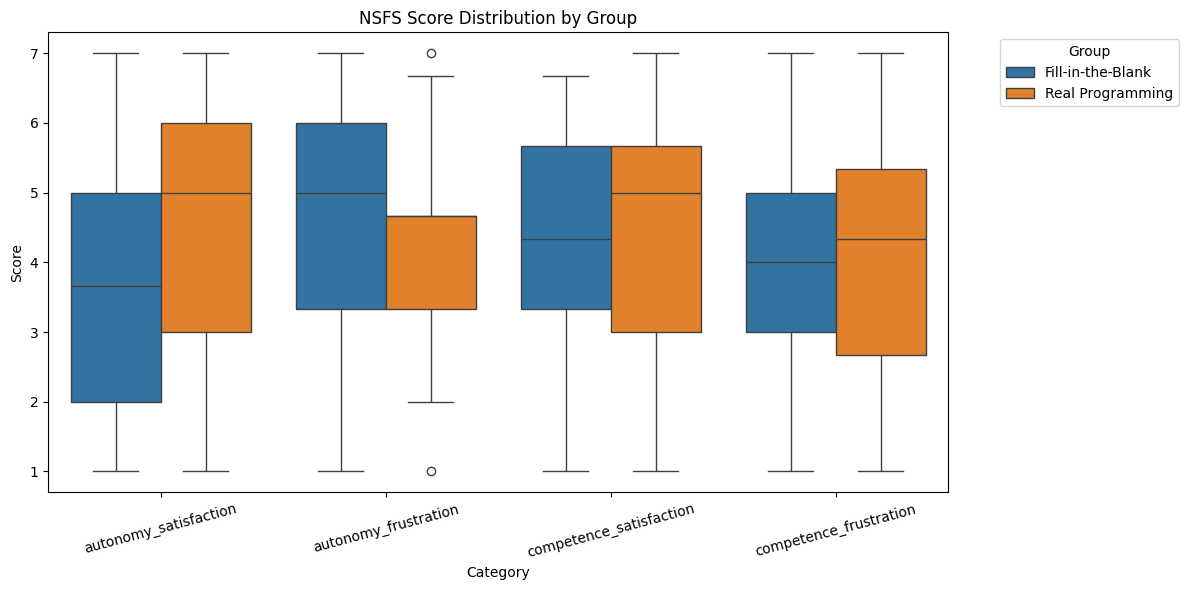

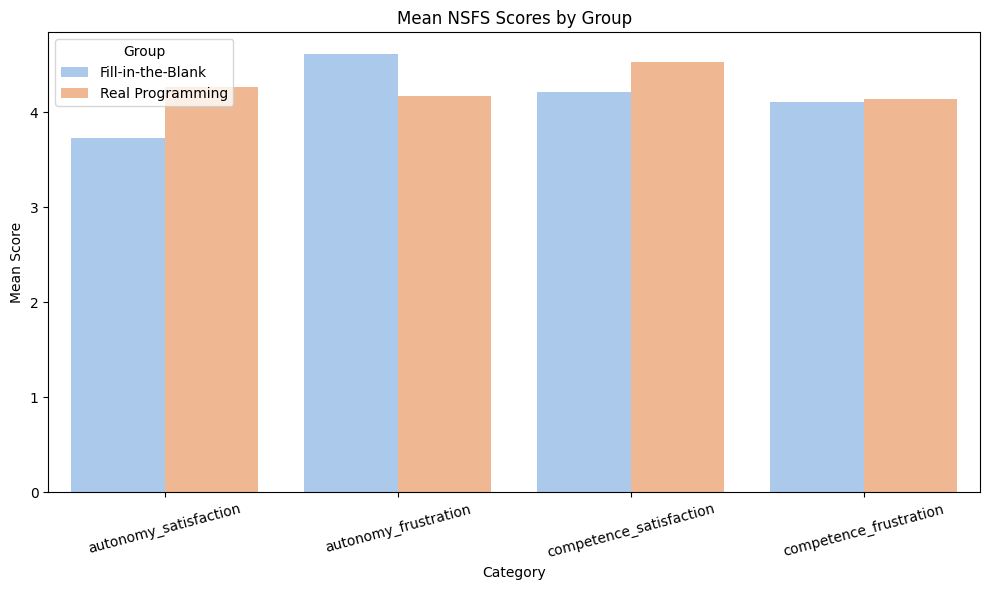

,t-statistic,p-value
autonomy_satisfaction,-1.012604,0.316411
autonomy_frustration,0.912481,0.366307
competence_satisfaction,-0.709084,0.481705
competence_frustration,-0.081474,0.935415


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

# Define the mean columns to visualize and compare
mean_columns = [
    'autonomy_satisfaction',
    'autonomy_frustration',
    'competence_satisfaction',
    'competence_frustration'
]

# Melt the DataFrame for seaborn plotting
df_melted = df_new.melt(id_vars=['group'], value_vars=mean_columns,
                        var_name='Category', value_name='Score')

# --- 📊 Visualization ---
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x='Category', y='Score', hue='group')
plt.title('NSFS Score Distribution by Group')
plt.xticks(rotation=15)
plt.legend(title='Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# --- 📈 Bar Plot of Group Means ---
group_means = df_new.groupby('group')[mean_columns].mean().reset_index()
group_means_melted = group_means.melt(id_vars='group', var_name='Category', value_name='Mean Score')

plt.figure(figsize=(10, 6))
sns.barplot(data=group_means_melted, x='Category', y='Mean Score', hue='group', palette='pastel')
plt.title('Mean NSFS Scores by Group')
plt.xticks(rotation=15)
plt.legend(title='Group')
plt.tight_layout()
plt.show()

# --- 📐 Statistical Comparison ---
ttest_results = {}
groups = df_new['group'].unique()

if len(groups) == 2:
    group1 = df_new[df_new['group'] == groups[0]]
    group2 = df_new[df_new['group'] == groups[1]]
    for col in mean_columns:
        stat, pval = ttest_ind(group1[col], group2[col], equal_var=False, nan_policy='omit')
        ttest_results[col] = {'t-statistic': stat, 'p-value': pval}

# Convert results to a DataFrame
ttest_df = pd.DataFrame.from_dict(ttest_results, orient='index')
ttest_df


In [52]:
# Recalculate mean and standard deviation for each group and category (since environment was reset)
mean_sd = df_new.groupby('group')[mean_columns].agg(['mean', 'std'])

# Format the results into a clean table
mean_sd = mean_sd.transpose()
mean_sd.columns = [f"{col}" for col in mean_sd.columns]
mean_sd.index.names = ['Category', 'Metric']
mean_sd.reset_index(inplace=True)

mean_sd


,Category,Metric,Fill-in-the-Blank,Real Programming
0,autonomy_satisfaction,mean,3.733333,4.266667
1,autonomy_satisfaction,std,1.737388,1.979057
2,autonomy_frustration,mean,4.613333,4.173333
3,autonomy_frustration,std,1.887287,1.500370
4,competence_satisfaction,mean,4.213333,4.533333
5,competence_satisfaction,std,1.571977,1.618756
6,competence_frustration,mean,4.106667,4.146667
7,competence_frustration,std,1.574449,1.883358


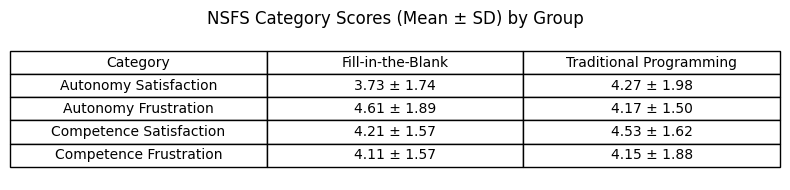

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.table as tbl

# Prepare the data
categories = [
    "Autonomy Satisfaction",
    "Autonomy Frustration",
    "Competence Satisfaction",
    "Competence Frustration"
]

fib_means = [3.73, 4.61, 4.21, 4.11]
fib_sds = [1.74, 1.89, 1.57, 1.57]

rp_means = [4.27, 4.17, 4.53, 4.15]
rp_sds = [1.98, 1.50, 1.62, 1.88]

# Create formatted strings for display
fib_scores = [f"{m:.2f} ± {s:.2f}" for m, s in zip(fib_means, fib_sds)]
rp_scores = [f"{m:.2f} ± {s:.2f}" for m, s in zip(rp_means, rp_sds)]

# Create DataFrame for display
df_table = pd.DataFrame({
    "Category": categories,
    "Fill-in-the-Blank": fib_scores,
    "Traditional Programming": rp_scores
})

# Plot the table using matplotlib
fig, ax = plt.subplots(figsize=(8, 2))
ax.axis('off')
table = ax.table(cellText=df_table.values, colLabels=df_table.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.5)
plt.title('NSFS Category Scores (Mean ± SD) by Group', fontsize=12, pad=10)
plt.tight_layout()
plt.show()


Challenges - Resource Use

In [53]:
import pandas as pd

# Load your dataset
df = pd.read_excel("challenge_comments_with_categories.xlsx")

# Normalize 'Comments Tag' for consistent searching
df["Comments Tag"] = df["Comments Tag"].astype(str).str.lower()

# Filter rows that include the tag "resource use"
resource_use_mentions = df[df["Comments Tag"].str.contains("resource use", na=False)]

# Count unique participants per group who mentioned it
resource_use_counts = resource_use_mentions.groupby("Group")["Participants No."].nunique()

print(resource_use_counts)


Group
Fill-in-the-Blank     9
Real Programming     15
Name: Participants No., dtype: int64


Learning

In [54]:
import ast

# Load the newly uploaded CSV file
df_learning = pd.read_csv("learning comments.csv")

# Convert Open Coding Tags to lists
df_learning["Open Coding Tags"] = df_learning["Open Coding Tags"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])

# Define tags that indicate positive perception of practice
positive_practice_tags = {
    "value_of_practice", "test_preparation", "confidence_boost", "learning_support"
}

# Count how many from Fill-in-the-Blank group had ANY of those positive tags
def has_positive_tags(tag_list):
    return any(tag in positive_practice_tags for tag in tag_list)

# Filter only Fill-in-the-Blank group
fib_group = df_learning[df_learning["Group"] == "Fill-in-the-Blank"]

# Apply condition
fib_group["Positive Practice"] = fib_group["Open Coding Tags"].apply(has_positive_tags)

# Count how many responded affirmatively
affirmative_count = fib_group["Positive Practice"].sum()
total_fib = fib_group.shape[0]
non_affirmative_count = total_fib - affirmative_count

non_affirmative_count


/tmp/ipython-input-54-1496240880.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fib_group["Positive Practice"] = fib_group["Open Coding Tags"].apply(has_positive_tags)


np.int64(6)

In [55]:
# Count sentiment distribution for Fill-in-the-Blank group
fib_sentiment_counts = df_learning[df_learning["Group"] == "Fill-in-the-Blank"]["Sentiment"].value_counts()

# Count sentiment distribution for Real Programming group
real_sentiment_counts = df_learning[df_learning["Group"] == "Real Programming"]["Sentiment"].value_counts()

# Combine into a DataFrame
sentiment_comparison = pd.DataFrame({
    "Fill-in-the-Blank": fib_sentiment_counts,
    "Real Programming": real_sentiment_counts
}).fillna(0).astype(int)

sentiment_comparison


,Fill-in-the-Blank,Real Programming
Sentiment,,
Negative,8,1
Neutral,7,3
Positive,10,21


Structure

In [56]:
# Re-import necessary libraries and reload the data since the session may have reset
import pandas as pd

# Reload the dataset
learning_comments_path = "learning comments.csv"
learning_comments_df = pd.read_csv(learning_comments_path)

# Define the function to check for 'structure_recognition'
def contains_structure_recognition(tags):
    if isinstance(tags, str):
        return 'structure_recognition' in tags
    return False

# Define the keywords related to syntax and structure
keywords = [
    'syntax_help', 'syntax_practice', 'syntax_recognition',
    'structure_recognition', 'layout_help', 'control_structures'
]

# Function to check if any keyword is present
def contains_any_keywords(tags):
    if isinstance(tags, str):
        return any(keyword in tags for keyword in keywords)
    return False

# Filter the fill-in-the-blank group
fib_group = learning_comments_df[learning_comments_df["Group"] == "Fill-in-the-Blank"]

# Count unique participants
total_fib_participants = fib_group["Participants No."].nunique()

# Count those who mentioned structure recognition
structure_recognition_count = fib_group["Open Coding Tags"].apply(contains_structure_recognition).sum()

# Count those who mentioned any of the syntax/structure related keywords
syntax_related_count = fib_group["Open Coding Tags"].apply(contains_any_keywords).sum()

structure_recognition_count, syntax_related_count, total_fib_participants


(np.int64(4), np.int64(8), 25)

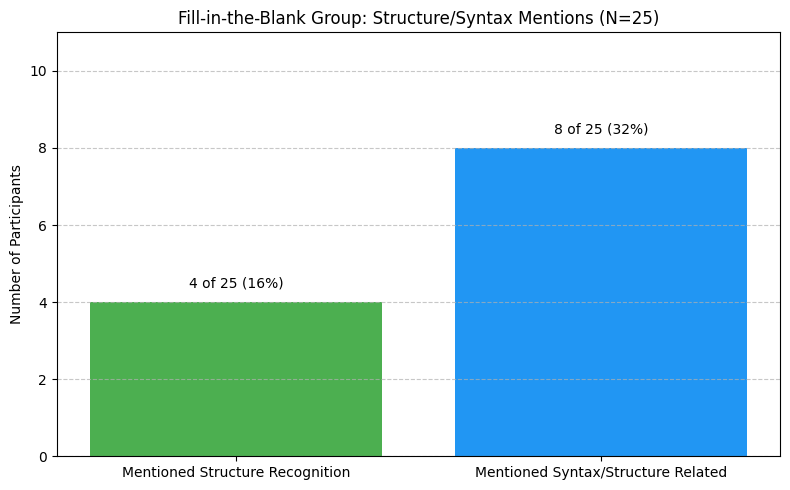

In [57]:
import matplotlib.pyplot as plt

# Prepare data for plotting
labels = ['Mentioned Structure Recognition', 'Mentioned Syntax/Structure Related']
values = [structure_recognition_count, syntax_related_count]
total = total_fib_participants
percentages = [f"{v} of {total} ({v/total:.0%})" for v in values]

# Create bar plot
plt.figure(figsize=(8, 5))
bars = plt.bar(labels, values, color=['#4CAF50', '#2196F3'])

# Annotate each bar with counts and percentage
for bar, label in zip(bars, percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.3, label, ha='center', va='bottom', fontsize=10)

plt.title('Fill-in-the-Blank Group: Structure/Syntax Mentions (N=25)')
plt.ylabel('Number of Participants')
plt.ylim(0, max(values) + 3)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


In [58]:
# Filter the traditional programming group
tp_group = learning_comments_df[learning_comments_df["Group"] == "Traditional Programming"]

# Count total participants in this group
total_tp_participants = tp_group["Participants No."].nunique()

# Count how many mentioned any of the syntax/structure related keywords
tp_syntax_related_count = tp_group["Open Coding Tags"].apply(contains_any_keywords).sum()

tp_syntax_related_count, total_tp_participants


(0, 0)

Challenges

In [59]:
import pandas as pd

# Load the updated challenge comments dataset
comments_path = "challenge_comments_with_categories.xlsx"
comments_df = pd.read_excel(comments_path)

# Filter only Real Programming group
rp_challenges = comments_df[comments_df["Group"] == "Real Programming"].copy()

# Drop duplicate comments per participant
unique_rp_comments = rp_challenges.drop_duplicates(subset=["Participants No.", "Comments"]).copy()

# Extended list of syntax/structure-related keywords
extended_syntax_keywords = [
    "syntax", "semicolon", "bracket", "structure", "layout", "indentation",
    "format", "comma", "colon", "quote", "parenthesis", "missing", "error"
]

# Function to detect presence of any extended keyword in a comment
def comment_mentions_extended_syntax(comment):
    if isinstance(comment, str):
        return any(keyword in comment.lower() for keyword in extended_syntax_keywords)
    return False

# Apply keyword detection
unique_rp_comments["Mentions Syntax/Structure"] = unique_rp_comments["Comments"].apply(comment_mentions_extended_syntax)

# Count how many unique comments mention syntax/structure issues
extended_syntax_structure_issue_count = unique_rp_comments["Mentions Syntax/Structure"].sum()
total_unique_rp_comments = unique_rp_comments.shape[0]

extended_syntax_structure_issue_count, total_unique_rp_comments


(np.int64(8), 25)

In [60]:
import pandas as pd

# Load the learning comments dataset
learning_comments_df = pd.read_csv("learning comments.csv")

# Function to identify expressions of feeling prepared
def is_positive_preparation(response):
    if isinstance(response, str):
        response = response.lower()
        return "yes" in response or "helped" in response or "prepared" in response
    return False

# Filter for Real Programming group
rp_learning_comments = learning_comments_df[learning_comments_df["Group"] == "Real Programming"].copy()

# Remove duplicate entries by participant
rp_unique_learning_comments = rp_learning_comments.drop_duplicates(subset=["Participants No.", "Q4"])

# Count how many participants expressed feeling prepared
rp_learning_prepared_count = rp_unique_learning_comments["Q4"].apply(is_positive_preparation).sum()
rp_learning_total = rp_unique_learning_comments["Participants No."].nunique()

# Output the counts
rp_learning_prepared_count, rp_learning_total


(np.int64(18), 25)